In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import numpy as np
churn_data = pd.read_csv('C:\DS\data_1\churn.csv',sep=',') 

churn_data=churn_data.drop(['RowNumber'],axis=1)


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

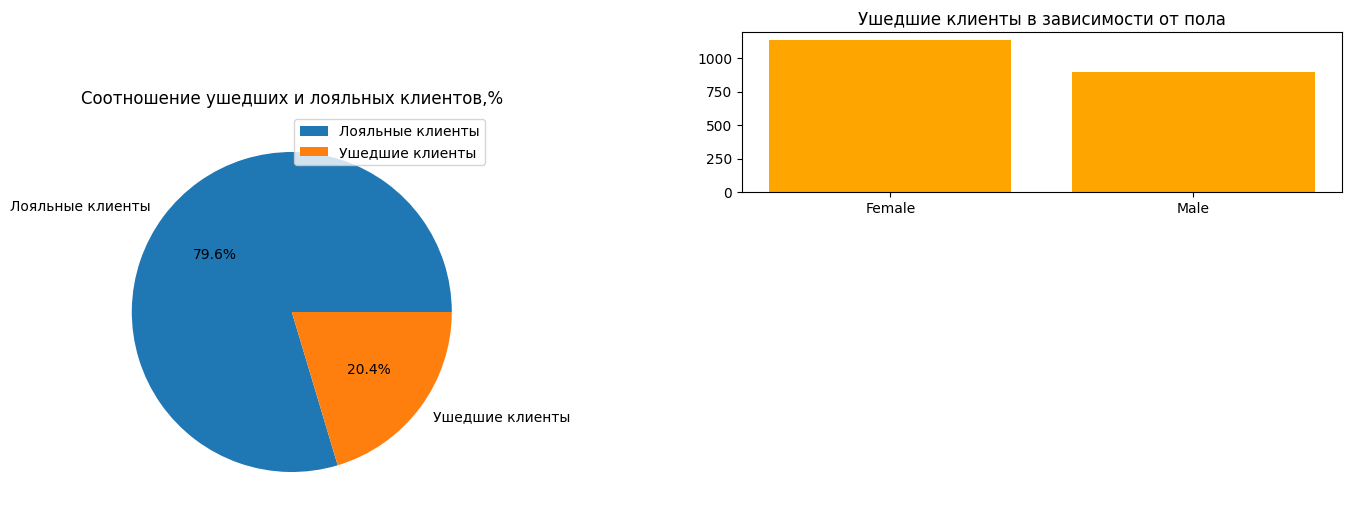

In [578]:
import matplotlib.pyplot as plt
churn_data_exited = churn_data['Exited'].value_counts()
labels=['Лояльные клиенты','Ушедшие клиенты']
#print(churn_data_exited)
fig = plt.figure(figsize=(15, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.pie(
    churn_data_exited,
    labels=labels,
    autopct='%.1f%%',
    
);
main_axes.set_title('Соотношение ушедших и лояльных клиентов,%')
legend_0_1=['Лояльные клиенты','Ушедшие клиенты']
main_axes.legend(legend_0_1);
axes=fig.add_axes([0.8,0.8,0.4,0.4])
count_gender=churn_data.groupby('Gender')['Exited'].sum()
#print(count_gender)
axes.bar(x=count_gender.index,height=count_gender, color="#FFA500")
axes.set_title('Ушедшие клиенты в зависимости от пола');

Из представленной диаграммы можно сделать вывод о том, что лояльных клиентов в банке значительно больше, процент лояльных составляет 79.6% , процент ушедших составил 20.4%. Из ушедших клиентов большинство составляют женщины.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
В Задание 9.2 сперва нужно сделать фильтр по всему датасету и отфильтровать значения баланкаса, чтобы он был > 2500. Далее на отфильтрованных данных построить распределение. Самый наглядный график в данном случае это гистограмма.



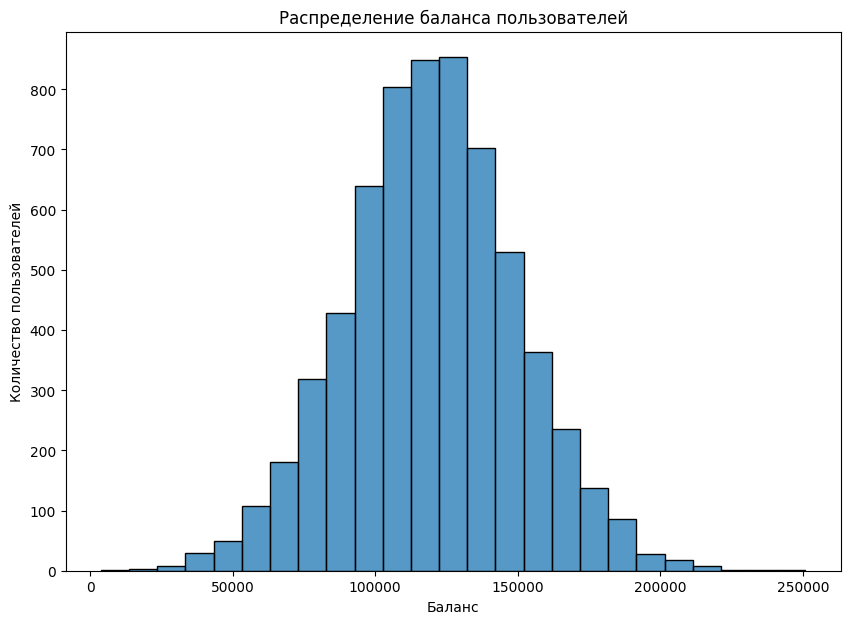

In [559]:
mask=churn_data['Balance']>2500

fig=plt.figure(figsize=(10,7))
sns.histplot(data=mask, x=churn_data[mask]['Balance'],bins=25)
plt.ylabel('Количество пользователей')
plt.xlabel('Баланс')
plt.title('Распределение баланса пользователей');


Из гистограммы можно сделать вывод о том, суммы хранящиеся на счетах пользователей практически не превышают 200-250 тысяч долларов, большинство пользователей  из выборки,порядка 800-850 человек, хранят на счете от 110 до 130 тысяч долларов. 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

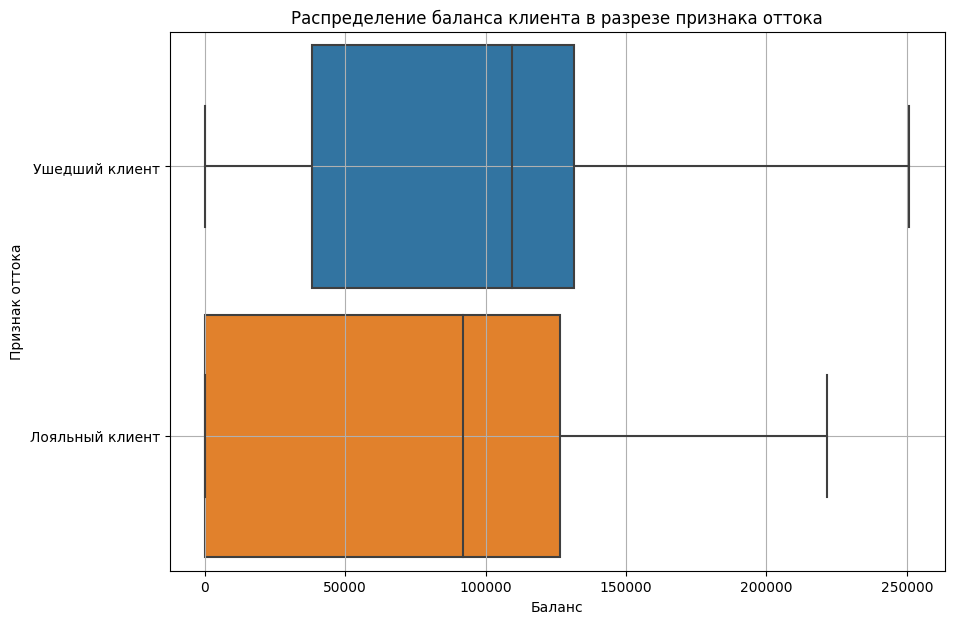

In [571]:
churn_data['Loyal']=churn_data['Exited'].copy()
churn_data['Loyal']=churn_data['Exited'].apply(lambda x: 'Ушедший клиент' if x==1 else 'Лояльный клиент')
#print(pivot['Exited'])balance_exited_c
#balance_exited=churn_data.groupby(by='Balance', as_index=False)['Exited'].sum()
#print(churn_data['Loyal'])

fig=plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyal',
    x='Balance',
    orient='h',
    width=0.9
)
#balance_exited.info()
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока')
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Признак оттока')
boxplot.grid()
plt.show()

Из диаграммы видно, что медианное значение у лояльных и ушедших клиентов находятся в райое 100 тысяч доларов, у лояльных клиентов крайняя точка усов совпадает с первым квантилем.  Возможно это связано с тем,что  основная масса лояльных  клиентов  банка не использует депозиты банка (в данной ситуации имела в виду, что суммы на счетах не большие, вероятнее это просто деньги на картах) как инструмент для получения финансовой выгоды.  Ушедшие клиенты держали на счете более крупные суммы, чем лояльные.Вероятнее всего это именно те клиенты, кто извлекает финансовую выгоду из депозитов( получает пассивный доход). Границы распределения у ушедших шире, чем у лояльных, возможно это говорит том, что ушедшие клиенты являются более продвинутыми пользователями финансовых услуг и их отток связан с появлением на рынке новых более интересных  предложений.  Следует провести анализ различных факторов таких как пол, возрвст,  услуги, которыми пользовались ушедшие клиенты. 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

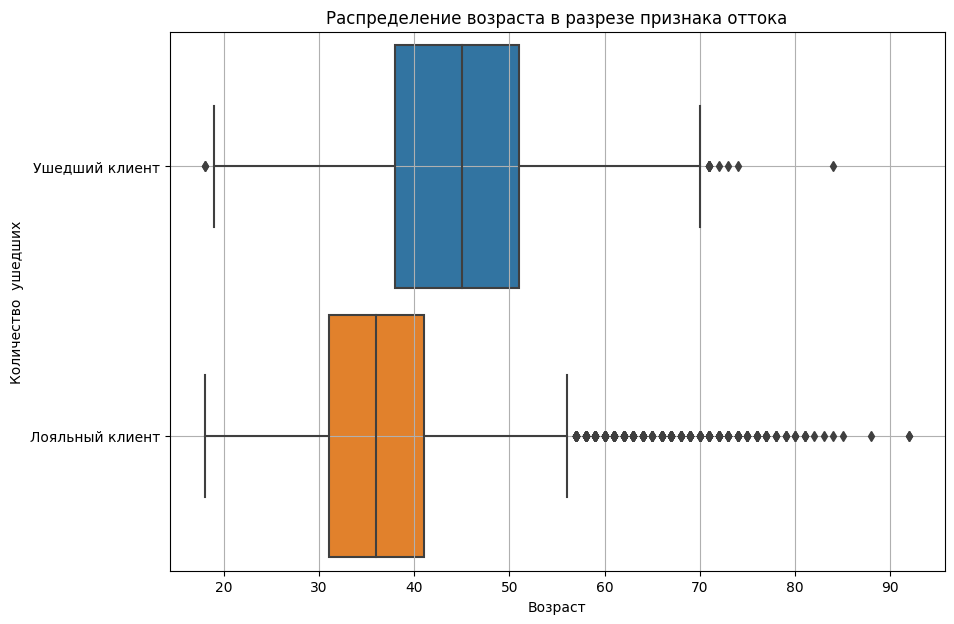

In [570]:
fig=plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyal',
    x='Age',
    orient='h',
    width=0.9
)
#balance_exited.info()
boxplot.set_title('Распределение возраста в разрезе признака оттока')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Количество  ушедших')
boxplot.grid()
plt.show()
#print(balance_exited)

Из представленной диаграммы видно, что основная масса  ушедших ориентировочно в возрасте от 38 до 52 лет, в то же время как лояльные клиенты в вохрасте примерно от 31 до 41 года. Медианное значение лояльных ниже, чем у ушедших. Максимальный возраст ушедших согласно диаграмме ( не считая выбросов) 70 лет, у лояльных 55, но у лояльных большее количество выбросов что может означать, возможно, на наличие клиентов с необычными потребностями или особыми обстоятельствами, которые могут влиять на решение клиенты остаться или уйти из банка. Банку следует обратить внимание на средний возраст от 38 до 52 лет. 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

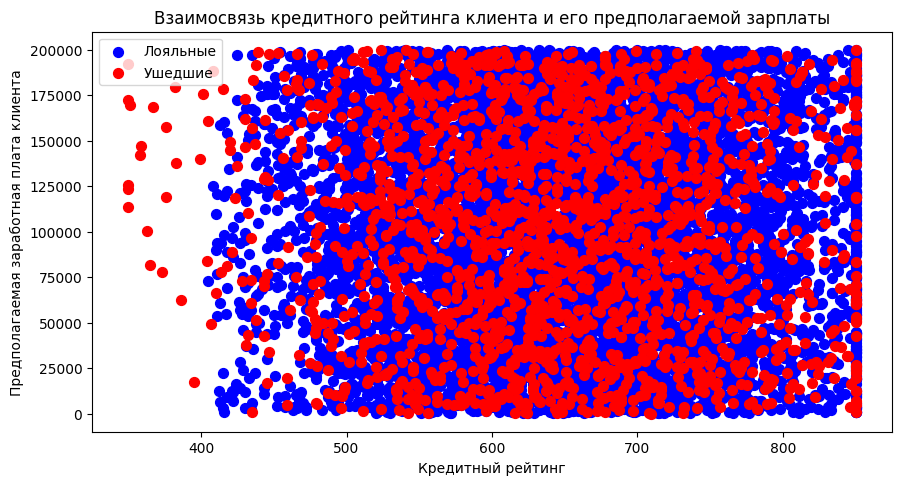

In [517]:
churn_data_ex=churn_data[churn_data['Exited']==1]
churn_data_no_ex=churn_data[churn_data['Exited']==0]
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])

axes.scatter(x=churn_data_no_ex['CreditScore'], y=churn_data_no_ex['EstimatedSalary'],s=50, marker='o',c='blue', label='Лояльные')
axes.scatter(x=churn_data_ex['CreditScore'], y=churn_data_ex['EstimatedSalary'],s=50, marker='o',c='red',label='Ушедшие');
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая заработная плата клиента')
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.legend();

Взаимосвязи между кредитным рейтингом и зарабтной платой не вижу. Одинаковое распределение.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.


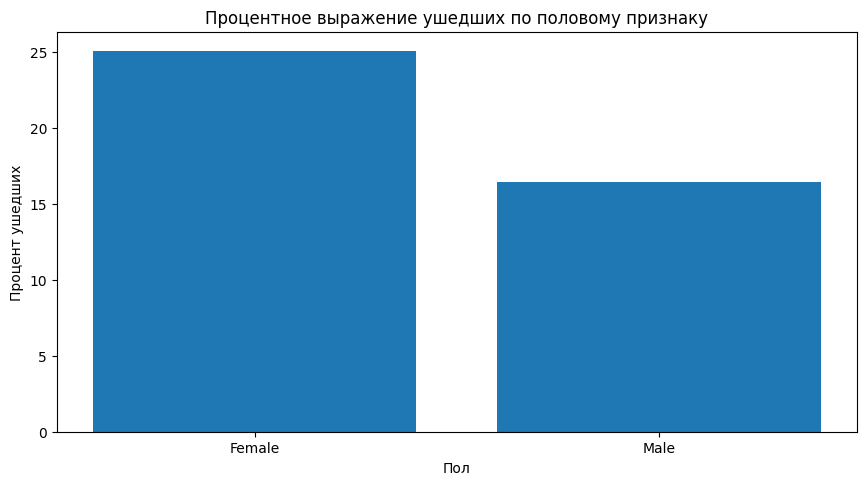

In [572]:
churn_data_M=churn_data[churn_data['Gender']=='Male']
churn_data_F=churn_data[churn_data['Gender']=='Female']
F_M_exited=churn_data.groupby(by='Gender' )['Exited'].mean()*100
#print(F_M_exited)

fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.bar(F_M_exited.index,F_M_exited.values);
axes.set_ylabel('Процент ушедших')
axes.set_xlabel('Пол')
axes.set_title('Процентное выражение ушедших по половому признаку');


Процент ухода клиентов женского пола( 25%) выше, чем мужского(16%). Больший отток клиентов женского пола может быть связан с рядом факторов: рекомендации и отзывы- женшины часто обмениваются между собой различным опытом и рекомендвциями, качество обслуживания - женщины более эмоциональны, нежеле мужчины и качество обслуживаения является важным фактором, влияющим на удовлетволпенность клиента и прочие. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

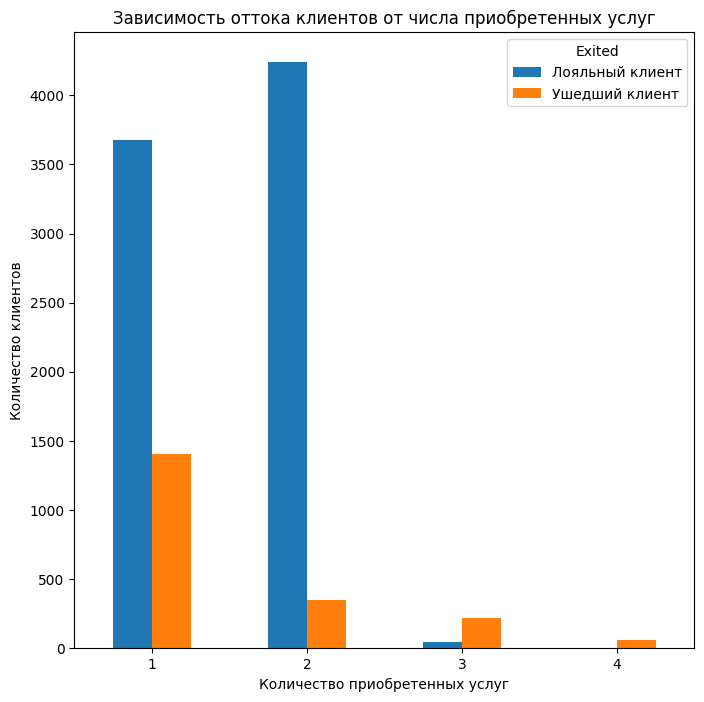

In [592]:
pivot = churn_data[['CustomerId','NumOfProducts', 'Exited']].copy()
pivot['Exited']=pivot['Exited'].apply(lambda x: 'Ушедший клиент' if x==1 else 'Лояльный клиент')
#print(pivot['Exited'])
pivot_1 = pivot.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot_1 = pivot_1.fillna(0)
fig,axes = plt.subplots(figsize=(8, 8))
pivot_1.plot(
    kind='bar',
    ax=axes,
     
    
);
axes.tick_params(axis='x', labelrotation = 1)
axes.set_ylabel('Количество клиентов')
axes.set_xlabel('Количество приобретенных услуг')
axes.set_title('Зависимость оттока клиентов от числа приобретенных услуг');
#print(pivot_1)


Из диаграммы видна зависимость : при увеличении количества используемых продуктов банка снижается количество ушедших. Иными словами: если клиент использует большее количество услу банка, тем меньше у него возникает желание перейти в другой банк.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

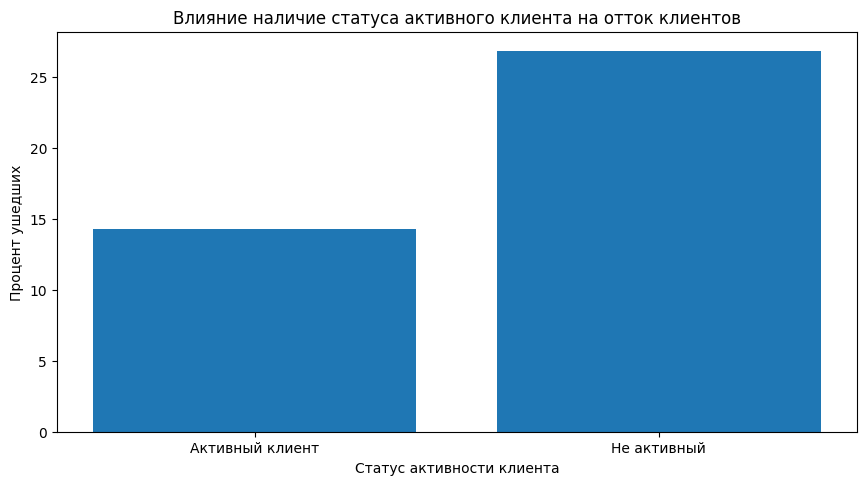

In [ ]:
IsActiveMember_Exited = churn_data[['IsActiveMember', 'Exited']].copy()
IsActiveMember_Exited['IsActiveMember']=IsActiveMember_Exited['IsActiveMember'].apply(lambda x: 'Активный клиент' if x==1 else 'Не активный')
status=IsActiveMember_Exited.groupby(by='IsActiveMember')['Exited'].mean()*100
#print(status)
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.bar(status.index,status.values);
axes.set_ylabel('Процент ушедших')
axes.set_xlabel('Статус активности клиента')
axes.set_title('Влияние наличие статуса активного клиента на отток клиентов');


Активные клиенты уходят реже,чем неактивные . Процент ухода активных равен 14%. Процент ухода не активных равен 27%. Банку следует развивать ассортимент продкутов и вовлекать клиентов в их пользование. 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [576]:
churn_data.columns
Exited_Geography= churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
Exited_Geography.columns
#print(Exited_Geography)
Exited_Geography= churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
#строим график
fig = px.choropleth(
    data_frame= Exited_Geography, #DataFrame
    locations=Exited_Geography.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    range_color=[0, 0.35], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Самая большая доля ушедших в Германии, это может быть связано с геополитическими факторами.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

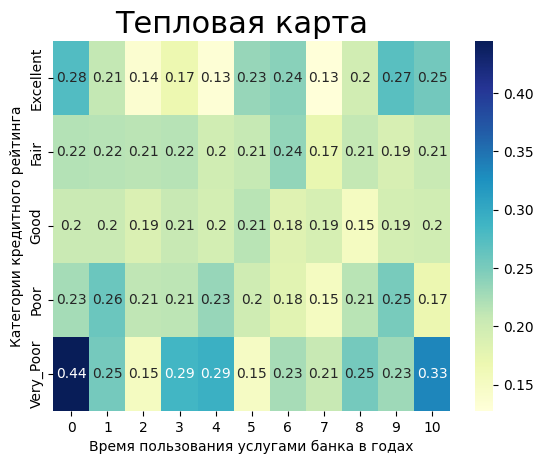

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
#print(churn_data['CreditScoreCat'])
churn_data.columns
CreditScoreCat_Tenure=churn_data.pivot_table(values='Exited',index='CreditScoreCat', columns='Tenure', aggfunc='mean')
#print(CreditScoreCat_Tenure)
CreditScoreCat_heat=sns.heatmap(CreditScoreCat_Tenure, cmap='YlGnBu', annot=True)
CreditScoreCat_heat.set_title('Тепловая карта  ', fontsize=22);
CreditScoreCat_heat.set_xlabel('Время пользования услугами банка в годах')
CreditScoreCat_heat.set_ylabel('Категории кредитного рейтинга');
  
    

Чаще всего уходят клиенты с кредитным рейтингом 'Very_Poor'. Соедует заметить, что клиенты с рейтингом Excellent также имеют высокий процент оттока, что объясняется конкуренцией на рынке (банки заинтересованы в надежных клиентах), такие клиенты получают предложения от другтх банков с лучшими условиями или акциями. Также у клиентов с высоким рейтингм могут меняться предпочтения к финансовым услугам. Ну и такие клиенты могут быть более активныими в поиске более интересных предложений и осведомленнее о более вгодных условиях в других банках. 